# Analysis Notebook
Select and analyze any previously generated experiment run and its data.

In [1]:
# Experiment Run Selector
import glob
import os

import ipywidgets as widgets
from IPython.display import display

base_dir = "./data/"
run_folders = sorted(glob.glob(os.path.join(base_dir, "run_*/")))
run_options = [os.path.basename(f[:-1]) for f in run_folders]  # Remove trailing slash
run_selector = widgets.Dropdown(
    options=run_options,
    value=run_options[-1] if run_options else None,
    description="Experiment Run:",
    style={"description_width": "initial"},
)
display(run_selector)

Dropdown(description='Experiment Run:', index=2, options=('run_20260207_121144', 'run_20260207_121428', 'run_2…

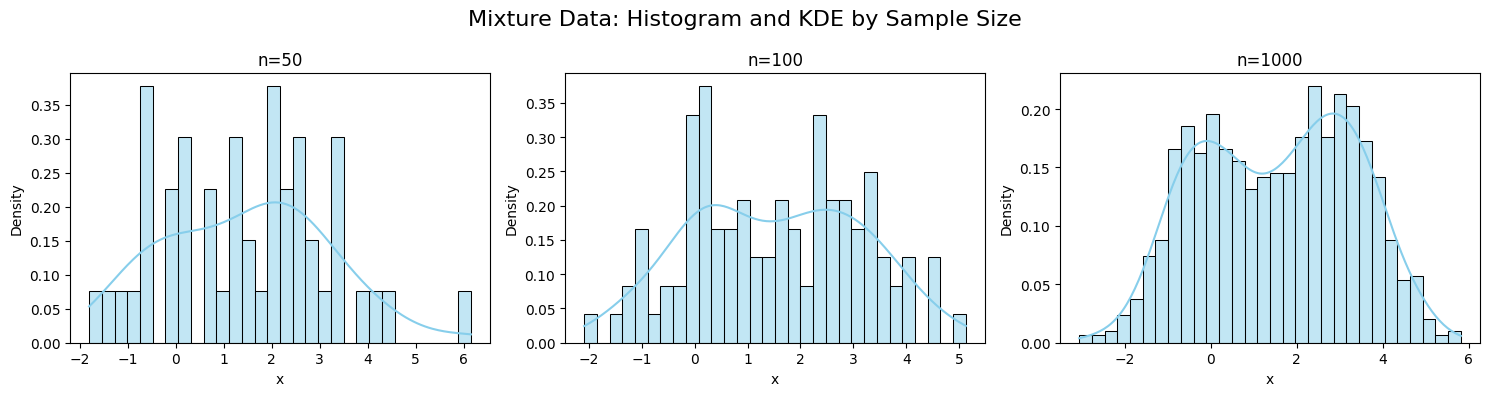

In [3]:
# Load and analyze selected experiment run
import json

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

selected_run = run_selector.value
run_path = os.path.join(base_dir, selected_run)
dgp_path = os.path.join(run_path, "dgp.json")

with open(dgp_path) as f:
    DGP = json.load(f)
means = DGP["means"]
stds = DGP["stds"]
weights = DGP["weights"]
sample_sizes = DGP["sample_sizes"]

loaded_data = {}
for n in sample_sizes:
    csv_path = os.path.join(run_path, f"mixture_samples_n{n}.csv")
    loaded_data[n] = np.loadtxt(csv_path, delimiter=",")

fig, axes = plt.subplots(1, len(sample_sizes), figsize=(5 * len(sample_sizes), 4))
if len(sample_sizes) == 1:
    axes = [axes]
for ax, n in zip(axes, sample_sizes):
    sns.histplot(
        loaded_data[n], bins=30, kde=True, ax=ax, color="skyblue", stat="density"
    )
    ax.set_title(f"n={n}")
    ax.set_xlabel("x")
    ax.set_ylabel("Density")
fig.suptitle("Mixture Data: Histogram and KDE by Sample Size", fontsize=16)
plt.tight_layout()
plt.show()